#Final Project

##1. Get and Clean Data

In [1]:
#API key for materialproject.org
my_API = "ZgxcNr18vD6uWe5o6hhtknT1FJZn7p00"

In [2]:
#install Pymatgen
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 18.8 MB/s eta 0:00:00


In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pymatgen.ext.matproj import MPRester

In [4]:
#Description of fields:
#https://api.materialsproject.org/docs#/Materials%20Summary/search_materials_summary__get

#Obtain data from Materials Project
with MPRester(my_API) as mpr:
  docs = mpr.summary.search(num_elements = [2,2],
                            exclude_elements = ["Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf", "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"],
                            is_stable=True,
                            fields=["material_id", "band_gap", "formation_energy_per_atom", "density_atomic", "formula_pretty"])

/usr/local/lib/python3.10/dist-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/5149 [00:00<?, ?it/s]

In [5]:
#Create dictionary to put data in Panda Dataframe
D = { "material_id":[],  "formula_pretty":[], "density_atomic":[], "band_gap":[], "formation_energy_per_atom":[]}
for doc in docs:
  D["density_atomic"].append(doc.density_atomic)
  D["band_gap"].append(doc.band_gap)
  D["formula_pretty"].append(doc.formula_pretty)
  D["material_id"].append(doc.material_id)
  D["formation_energy_per_atom"].append(doc.formation_energy_per_atom)

mp_query = pd.DataFrame(D)

In [6]:
mp_query

,material_id,formula_pretty,density_atomic,band_gap,formation_energy_per_atom
0,mp-1185636,Mg149Tc,22.877356,0.0978,-0.018674
1,mp-1223503,K5As4,32.273652,0.0000,-0.437151
2,mp-849086,CuS2,16.316454,0.0000,-0.432674
3,mp-1219378,Sm14Ag51,20.401661,0.0000,-0.246306
4,mp-22266,GdB6,9.856148,0.0000,-0.456620
...,...,...,...,...,...
5144,mp-408,Mg2Ge,21.525290,0.1520,-0.268911
5145,mp-1620,Si2W,13.438418,0.0000,-0.345997
5146,mp-1274279,FeO,10.623560,1.8157,-1.482156
5147,mp-1518,CeRh3,16.443801,0.0000,-0.634512


In [7]:
#Clean data
#Check for missing values and see if any strings need converted to float
mp_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                5149 non-null   object 
 1   formula_pretty             5149 non-null   object 
 2   density_atomic             5149 non-null   float64
 3   band_gap                   5149 non-null   float64
 4   formation_energy_per_atom  5149 non-null   float64
dtypes: float64(3), object(2)
memory usage: 201.3+ KB


In [8]:
#Check for duplicates
mp_query.loc[mp_query.duplicated() == True]

,material_id,formula_pretty,density_atomic,band_gap,formation_energy_per_atom


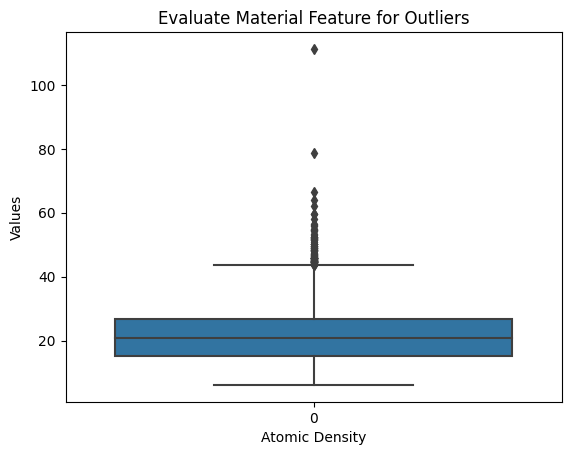

In [9]:
#Check for outliers
sns.boxplot(data = mp_query.density_atomic)
plt.ylabel("Values")
plt.xlabel("Atomic Density")
plt.title("Evaluate Material Feature for Outliers")
plt.show()

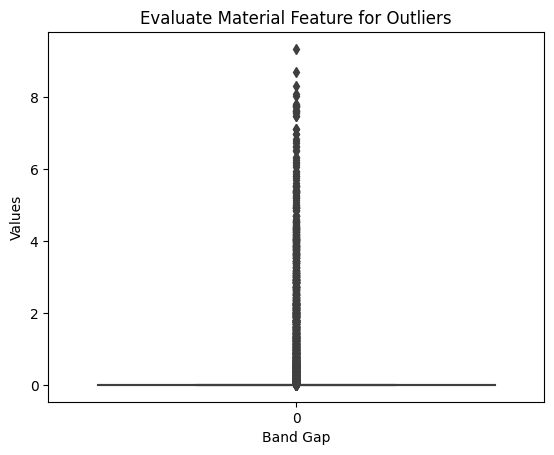

In [10]:
#Check for outliers
sns.boxplot(data = mp_query.band_gap)
plt.ylabel("Values")
plt.xlabel("Band Gap")
plt.title("Evaluate Material Feature for Outliers")
plt.show()

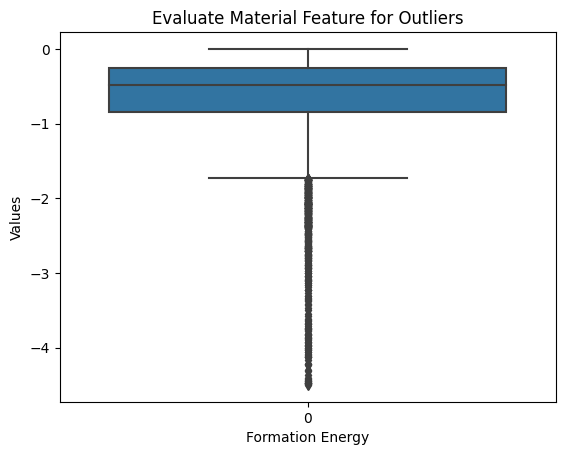

In [11]:
#Check for outliers
sns.boxplot(data = mp_query.formation_energy_per_atom)
plt.ylabel("Values")
plt.xlabel("Formation Energy")
plt.title("Evaluate Material Feature for Outliers")
plt.show()

In [12]:
#No extreme outliers

##2. Create New Features

In [13]:
#Read csv file and import atomic properties
df = pd.read_csv('periodic_table_final.csv')

In [14]:
df.head()

,Unnamed: 0,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,...,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes
0,0,1.0,Hydrogen,H,1.007,0.0,1.0,1.0,1.0,1.0,...,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0
1,1,2.0,Helium,He,4.002,2.0,2.0,2.0,1.0,18.0,...,yes,NaN,Noble Gas,0.49,0.00,24.5874,0.000179,0.950,4.22,5.0
2,2,3.0,Lithium,Li,6.941,4.0,3.0,3.0,2.0,1.0,...,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0
3,3,4.0,Beryllium,Be,9.012,5.0,4.0,4.0,2.0,2.0,...,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0
4,4,5.0,Boron,B,10.811,6.0,5.0,5.0,2.0,13.0,...,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0


In [15]:
from pymatgen.core import Composition
df.set_index("Symbol", inplace=True)

In [16]:
#Add Averaged Features to Database

#Calculate atomic fraction and multiply by feature
#Add fractioned feature to get average

features = ["AtomicRadius", "Electronegativity", "FirstIonization"]

for i in features:
  for j in range(len(mp_query)):
    comp = Composition(mp_query.loc[j]['formula_pretty'])
    a = comp.elements[0].name #this will give you the first element with just the name
    b = comp.get_atomic_fraction(a)*(df.loc[a][i]) #will give the feature for first element
    c = comp.elements[1].name #this will give you the second element with just the name
    d = comp.get_atomic_fraction(c)*(df.loc[c][i]) #will give the feature for second element
    e = b + d #add both element's feature
    mp_query.loc[mp_query['formula_pretty'] == mp_query.loc[j]['formula_pretty'], "avg_"+i] = e #input into database

In [17]:
#Add electronegativity difference

for j in range(len(mp_query)):
  comp = Composition(mp_query.loc[j]['formula_pretty'])
  a = comp.elements[0].name #this will give you the first element with just the name
  b = (df.loc[a]["Electronegativity"]) #will give the electronegativity for first element
  c = comp.elements[1].name #this will give you the second element with just the name
  d = (df.loc[c]["Electronegativity"]) #will give the electronegativity for second element
  e = abs(b - d) #difference in electronegativity
  mp_query.loc[mp_query['formula_pretty'] == mp_query.loc[j]['formula_pretty'], "Electronegativity_diff"] = e #input into database

In [18]:
#Add if material is a metal or not based on band gap
#band gap < 0.001 is metal (0)

mp_query["metallicity"] = 1

for j in range(len(mp_query)):
  mp_query.loc[mp_query['band_gap'] < 0.001, "metallicity"] = 0

In [19]:
#Check to see if metallicity is balanced or not
mp_query['metallicity'].value_counts()

#more metals than nonmetals in dataset

0    3955
1    1194
Name: metallicity, dtype: int64

In [20]:
mp_query.head()

,material_id,formula_pretty,density_atomic,band_gap,formation_energy_per_atom,avg_AtomicRadius,avg_Electronegativity,avg_FirstIonization,Electronegativity_diff,metallicity
0,mp-1185636,Mg149Tc,22.877356,0.0978,-0.018674,1.702000,1.313933,7.643759,0.59,1
1,mp-1223503,K5As4,32.273652,0.0000,-0.437151,2.133333,1.424444,6.761989,1.36,0
2,mp-849086,CuS2,16.316454,0.0000,-0.432674,1.266667,2.353333,9.482133,0.68,0
3,mp-1219378,Sm14Ag51,20.401661,0.0000,-0.246306,1.972308,1.766308,7.159969,0.76,0
4,mp-22266,GdB6,9.856148,0.0000,-0.456620,1.385714,1.920000,7.991157,0.84,0


<ipython-input-21-05a219f08ec6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mp_query.corr(), annot = True, annot_kws={"size": 20}, fmt = '.2')


<Axes: >

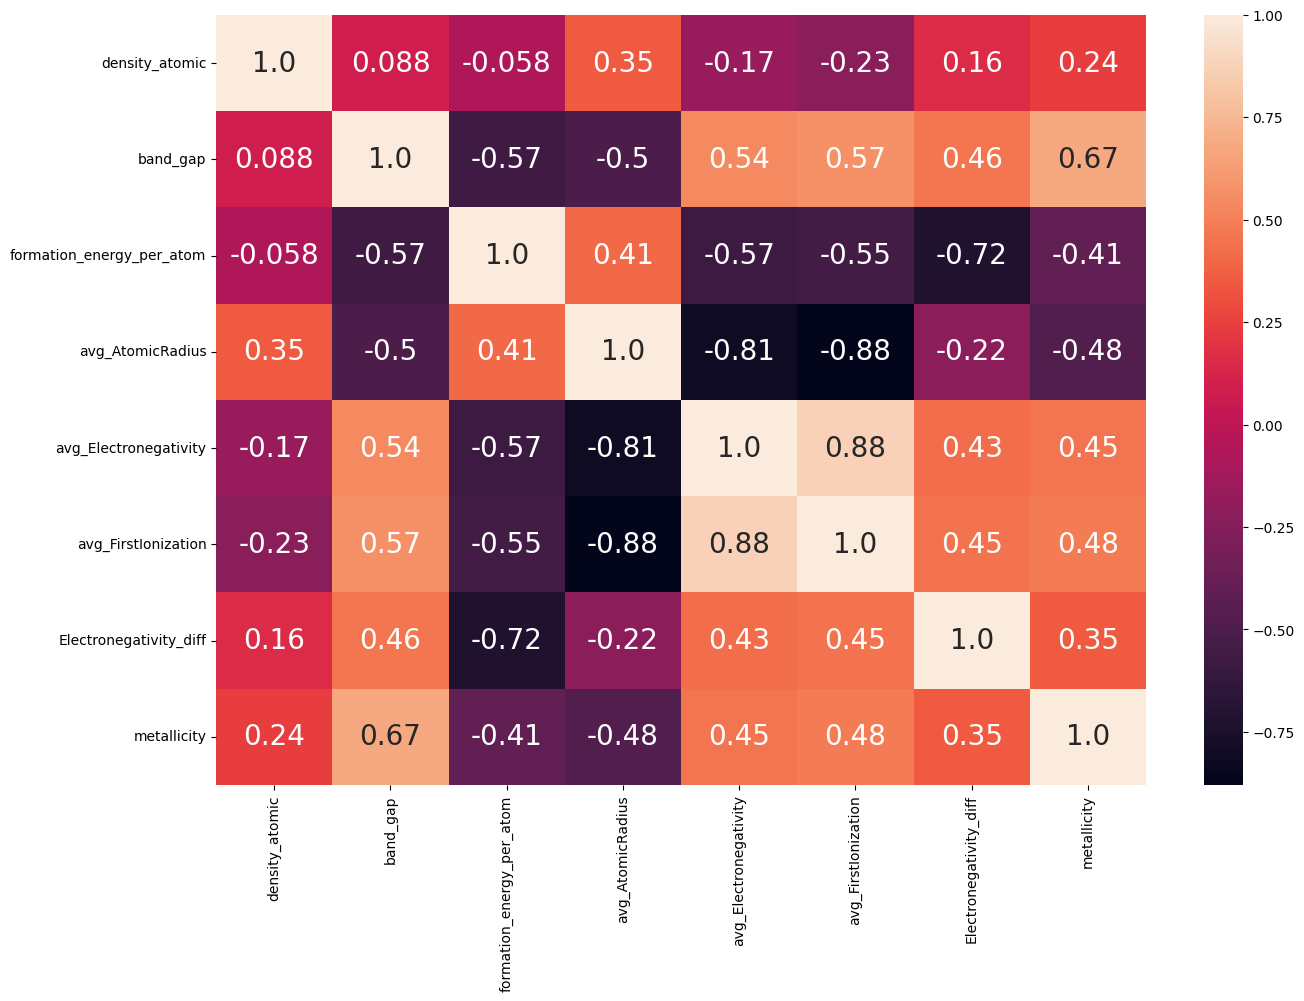

In [21]:
#Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(mp_query.corr(), annot = True, annot_kws={"size": 20}, fmt = '.2')

#from heatmap, formation energy is strongly correlated to electronegativity difference
#and metallicity is correlated to average atomic radius and average first ionization (excluding band gap)

##3. Building Regression and Classification Models

###Regression Models

####Linear Regression

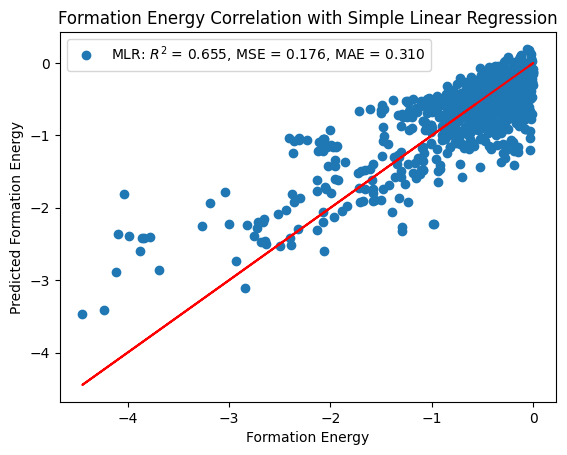

In [22]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

y = mp_query["formation_energy_per_atom"]
x = mp_query.drop(["formation_energy_per_atom", "material_id", "formula_pretty", "metallicity"], axis = 1)

#Split data
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#split data one more time to create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
ypred = reg.predict(X_val)

r2 = r2_score(y_val, ypred)
mse = mean_squared_error(y_val, ypred)
mae = mean_absolute_error(y_val, ypred)

label = "MLR: $R^2$ = %.3f, MSE = %.3f, MAE = %.3f" % (r2, mse, mae)
plt.plot(y_val, ypred, "o", label = label)
plt.ylabel("Predicted Formation Energy")
plt.xlabel("Formation Energy")
plt.legend(loc = "upper left")
plt.title("Formation Energy Correlation with Simple Linear Regression")
plt.plot(y_val, y_val, color='r')
plt.show()

In [23]:
#Find the non_zero coefficients and which elements have largest impact?

real_coef = reg.coef_
real_interp = reg.intercept_
equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("K = %.1f + %s" % (real_interp, " + ".join(equation)))

#With linear regression, first ionization, electronegativty, and atomic radius have the largest effect on formation energy

K = 0.2 + 4.47e-04 AtomicRadius + -1.17e-01 Electronegativity + 1.52e-01 FirstIonization


####Cross Validation

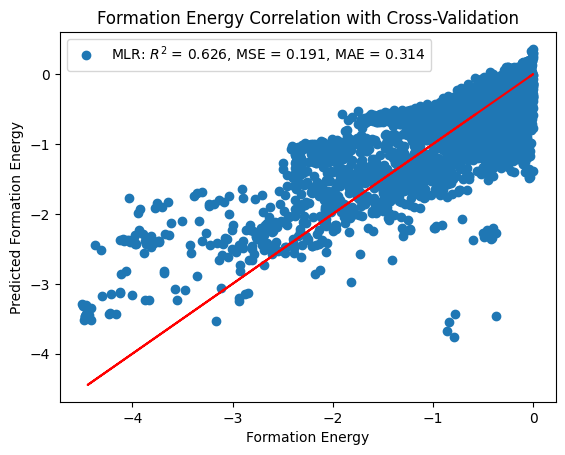

In [24]:
#Cross Validation
from sklearn.model_selection import cross_val_predict, KFold

kfold = KFold(n_splits = 10, random_state = 2, shuffle = True)

reg_cv = linear_model.LinearRegression()
ypred_cv = cross_val_predict(reg_cv, x, y, cv=kfold)

r2_cv = r2_score(y, ypred_cv)
mse_cv = mean_squared_error(y, ypred_cv)
mae_cv = mean_absolute_error(y, ypred_cv)

label_cv = "MLR: $R^2$ = %.3f, MSE = %.3f, MAE = %.3f" % (r2_cv, mse_cv, mae_cv)

plt.plot(y, ypred_cv, "o", label=label_cv)
plt.ylabel("Predicted Formation Energy")
plt.xlabel("Formation Energy")
plt.legend(loc = "upper left")
plt.title("Formation Energy Correlation with Cross-Validation")
plt.plot(y_val, y_val, color='r')
plt.show()

####LASSO

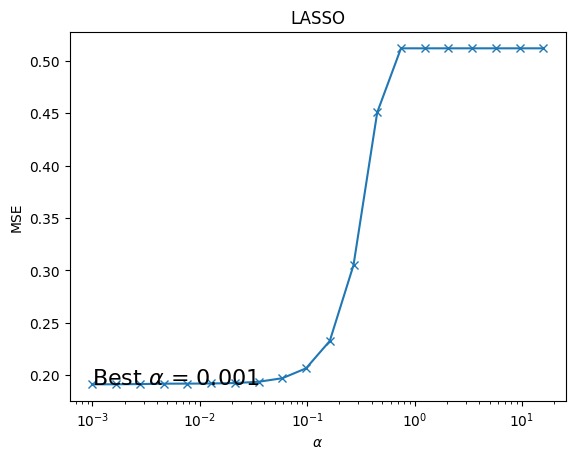

In [25]:
#LASSO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold

scaler = StandardScaler()
scaler.fit(x)
means_ = scaler.mean_
stds_ = scaler.scale_
z = scaler.transform(x)

kfold = KFold(n_splits = 10, random_state = 2, shuffle = True)
alphas = np.logspace(-3, 1.2, 20)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z, y)
    scores = cross_validate(lasso, z, y, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))
features = ['density_atomic', 'band_gap', 'avg_AtomicRadius', 'avg_Electronegativity', 'avg_FirstIonization', 'Electronegativity_diff']
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
plt.xscale("log")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.title("LASSO")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);

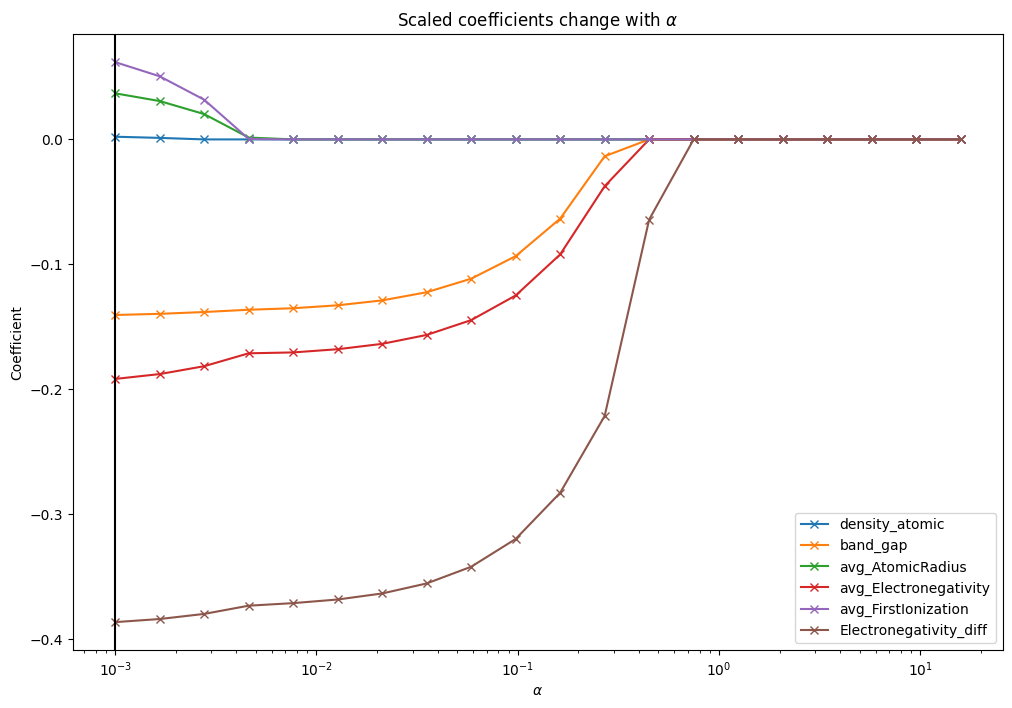

In [26]:
#Look at the variation of coefficients
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], "-x", label=f)
    plt.xscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Coefficient")
    plt.title(r"Scaled coefficients change with $\alpha$")
plt.legend()
plt.axvline(x = best_alpha, color = 'black')

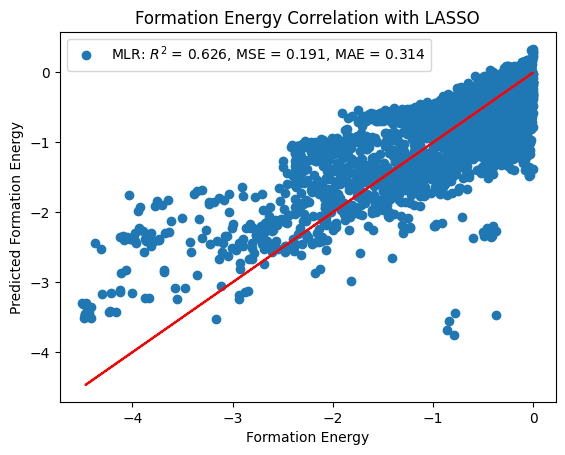

In [27]:
#Optimize LASSO with best alpha
lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
ypred_lasso = cross_val_predict(lasso, z, y, cv=kfold)
r2_lasso = r2_score(y, ypred_lasso)
mse_lasso = mean_squared_error(y, ypred_lasso)
mae_lasso = mean_absolute_error(y, ypred_lasso)
label_lasso = "MLR: $R^2$ = %.3f, MSE = %.3f, MAE = %.3f" % (r2_lasso, mse_lasso, mae_lasso)
plt.plot(y, ypred_lasso, "o", label=label_lasso)
l = plt.ylabel("Predicted Formation Energy")
l = plt.xlabel("Formation Energy")
plt.legend(loc = "upper left")
plt.title("Formation Energy Correlation with LASSO")
plt.plot(y_test, y_test, color='r')
plt.show()

In [28]:
#Find the non_zero coefficients and which elements have largest impact?

real_coef = reg.coef_ / stds_  # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs
equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("K = %.1f + %s" % (real_interp, " + ".join(equation)))

#With LASSO, electronegativity difference, electronegativty, and atomic radius have the largest effect on formation energy

K = 2.2 + -1.07e-01 band_gap + 4.25e-01 avg_AtomicRadius + -8.84e-01 avg_Electronegativity + 1.90e-02 avg_FirstIonization + -1.41e+00 Electronegativity_diff


####Ridge Regression

In [29]:
#Ridge Regression
from sklearn.linear_model import Ridge

scaler = StandardScaler()
scaler.fit(X_train, y_train)

model = Ridge(alpha = 1.0)
model.fit(X_train,y_train)

Ridge()

In [30]:
#Predict with validation data
y_pred_val = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print('MAE with valid data:', mae)
print('MSE with valid data:', mse)
print('R2 with valid data:', r2)

MAE with valid data: 0.3097921331837379
MSE with valid data: 0.176166333308569
R2 with valid data: 0.6552558445143958


In [31]:
#Optimize to find best alpha
from sklearn.model_selection import GridSearchCV
model = Ridge()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(model, hyperParameters, scoring='neg_mean_squared_error', cv=5)
ridgeRegressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [32]:
print("Best value for lambda : ",ridgeRegressor.best_params_)

Best value for lambda :  {'alpha': 1}


In [33]:
model = Ridge(alpha = 1)
model.fit(X_train,y_train)

Ridge(alpha=1)

In [34]:
#Verify with validation and test with test data
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('MAE with valid data:', mae_val)
print('MSE with valid data:', mse_val)
print('R2 with valid data:', r2_val)

print('MAE with test data:', mae_test)
print('MSE with test data:', mse_test)
print('R2 with test data:', r2_test)

MAE with valid data: 0.3097921331837379
MSE with valid data: 0.176166333308569
R2 with valid data: 0.6552558445143958
MAE with test data: 0.3301085051233207
MSE with test data: 0.2218924909225856
R2 with test data: 0.5778394170287227


In [35]:
#Find the non_zero coefficients and which elements have largest impact?

real_coef = model.coef_
real_interp = model.intercept_
equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("K = %.1f + %s" % (real_interp, " + ".join(equation)))

#Ridge regression is similar to LASSO; electronegativity difference, electronegativty,
#and atomic radius have the largest effect on formation energy

K = 0.2 + 4.42e-04 density_atomic + -1.18e-01 band_gap + 1.49e-01 avg_AtomicRadius + -4.09e-01 avg_Electronegativity + 3.54e-02 avg_FirstIonization + -7.47e-01 Electronegativity_diff


####Support Vector Regression

In [36]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

SVR()

In [37]:
#Predict with validation data
y_pred_val = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print('MAE with valid data:', mae)
print('MSE with valid data:', mse)
print('R2 with valid data:', r2)

MAE with valid data: 0.3021109671866281
MSE with valid data: 0.1891277224510178
R2 with valid data: 0.6298913888325766


In [38]:
#Optimize
param_grid = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.05, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = SVR(**best_params)
best_model.fit(X_train, y_train)
# Evaluate on the validation set
y_pred_val = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", -best_score)
print("Validation Set - Mean Squared Error:", mse_val)
print("Validation Set - Mean Absolute Error:", mae_val)
print("Validation Set - R-squared:", r2_val)

Best Parameters: {'C': 1000, 'epsilon': 0.05}
Best Mean Squared Error: 0.15483059409432412
Validation Set - Mean Squared Error: 0.13828872820049481
Validation Set - Mean Absolute Error: 0.2629846515092706
Validation Set - R-squared: 0.7293794454292652


In [39]:
#Test with test data
y_pred_test = best_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('MAE with test data:', mae_test)
print('MSE with test data:', mse_test)
print('R2 with test data:', r2_test)

MAE with test data: 0.2977532678917434
MSE with test data: 0.3873275822206591
R2 with test data: 0.2630916114769466


In [40]:
#Composition-property relationship
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{features[i] : <8}"
          f"{r.importances_mean[i] : .3f}"
          f" +/- {r.importances_std[i] : .3f}")

#Support Vector's permutation analysis shows avg ionization, avg electronegativity,
#and electronegativity difference have the largest effect on formation energy

avg_Electronegativity 0.778 +/-  0.055
avg_FirstIonization 0.749 +/-  0.100
Electronegativity_diff 0.570 +/-  0.035
band_gap 0.133 +/-  0.013
density_atomic 0.078 +/-  0.009
avg_AtomicRadius 0.075 +/-  0.007


####Decision Tree

In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [42]:
#Predict with validation data
y_pred_val = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print('MAE with valid data:', mae)
print('MSE with valid data:', mse)
print('R2 with valid data:', r2)

MAE with valid data: 0.3457469145982446
MSE with valid data: 0.2328774643299251
R2 with valid data: 0.5442764615448583


In [43]:
#Optimize
from numpy.ma.core import masked_values

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Evaluate on the validation set
y_pred_val = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", -best_score)
print("Validation Set - Mean Squared Error:", mse_val)
print("Validation Set - Mean Absolute Error:", mae_val)
print("Validation Set - R-squared:", r2_val)

Best Parameters: {'max_depth': 7, 'min_samples_split': 2}
Best Mean Squared Error: 0.13405332871472084
Validation Set - Mean Squared Error: 0.12444213325704015
Validation Set - Mean Absolute Error: 0.2352044356293299
Validation Set - R-squared: 0.7564761817379634


In [44]:
#Test with test data
y_pred_test = best_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('MAE with test data:', mae_test)
print('MSE with test data:', mse_test)
print('R2 with test data:', r2_test)

MAE with test data: 0.23069082787515596
MSE with test data: 0.12567053710430168
R2 with test data: 0.7609060721898206


Variable: Electronegativity_diff Importance: 0.67
Variable: avg_Electronegativity Importance: 0.12
Variable: avg_AtomicRadius      Importance: 0.08
Variable: avg_FirstIonization   Importance: 0.06
Variable: band_gap              Importance: 0.04
Variable: density_atomic        Importance: 0.03


<ipython-input-45-08090da98177>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


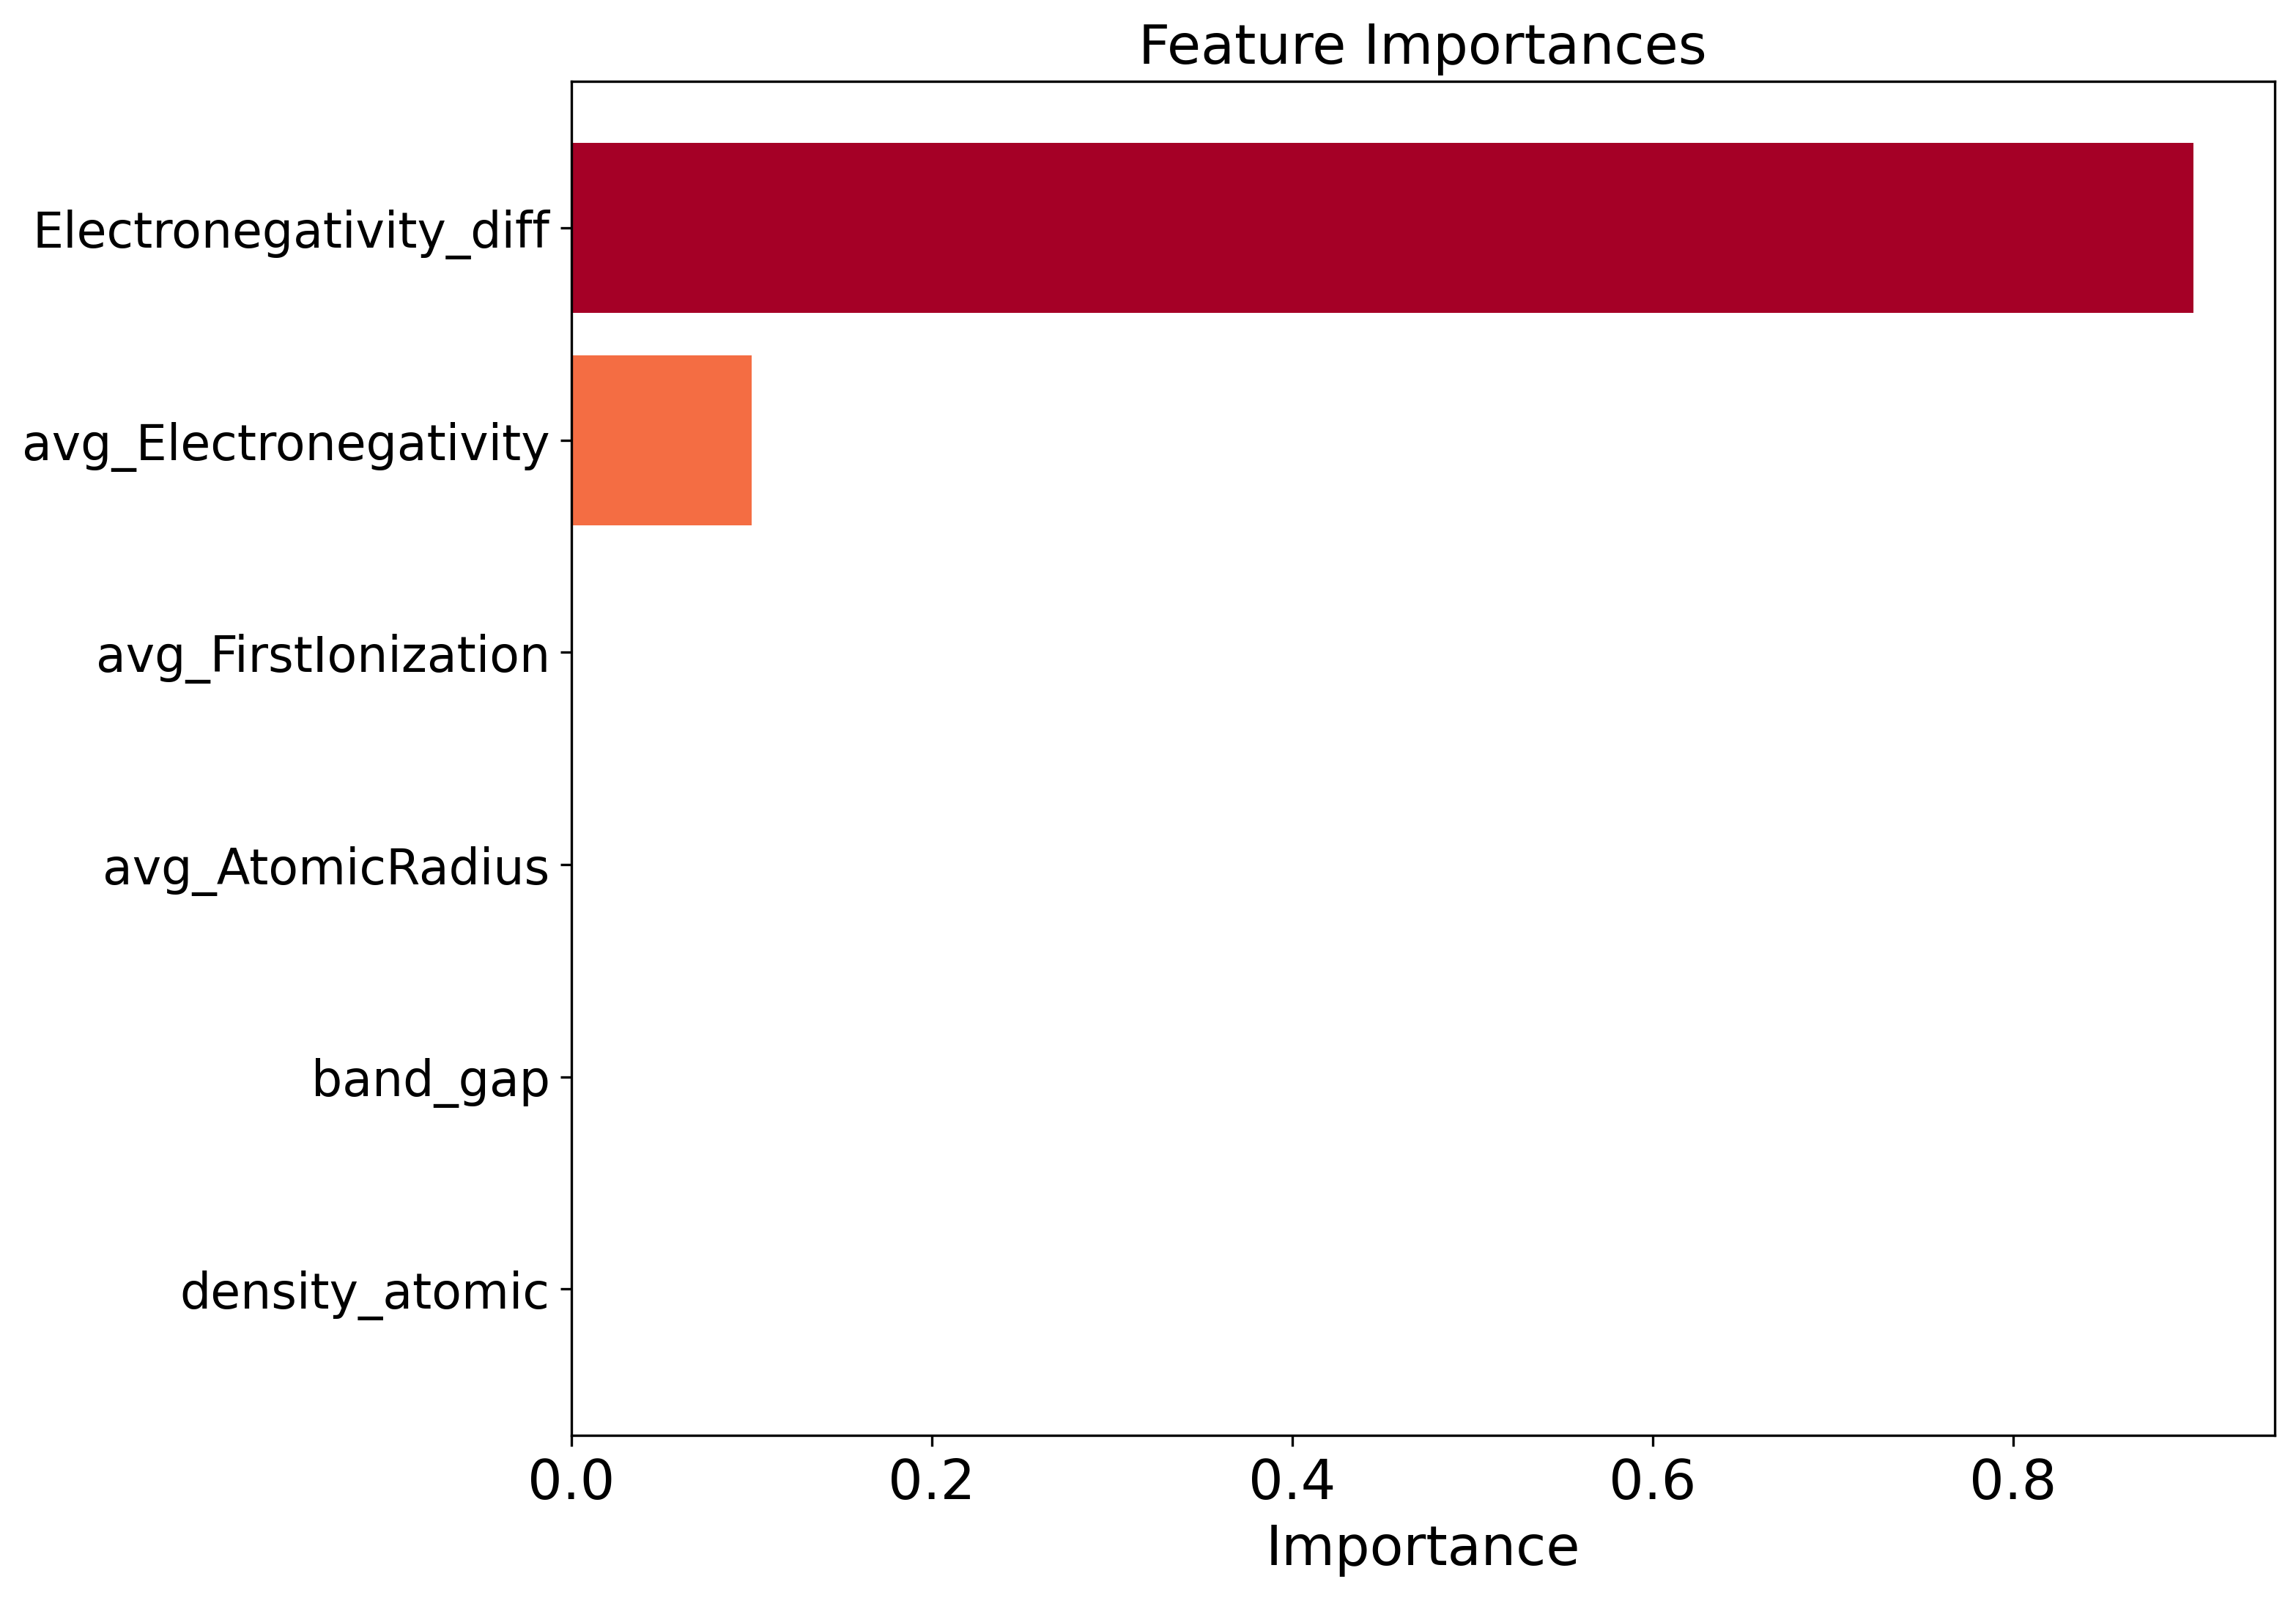

In [45]:
#Feature of Importance
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(best_model.feature_importances_)

# List of tuples with variable and importance
feature_list = list(x.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()

#Decision tree shows electonegativity difference has the largest effect on formation energy

####Random Forest Regression

In [46]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [47]:
#Predict with validation data
y_pred_val = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print('MAE with valid data:', mae)
print('MSE with valid data:', mse)
print('R2 with valid data:', r2)

MAE with valid data: 0.3260978012757337
MSE with valid data: 0.1995617461445967
R2 with valid data: 0.6094727956825501


In [48]:
#Optimize
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Evaluate on the validation set
y_pred_val = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", -best_score)
print("Validation Set - Mean Squared Error:", mse_val)
print("Validation Set - Mean Absolute Error:", mae_val)
print("Validation Set - R-squared:", r2_val)

Best Parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
Best Mean Squared Error: 0.09886189327793718
Validation Set - Mean Squared Error: 0.09985635598620127
Validation Set - Mean Absolute Error: 0.2222001081826096
Validation Set - R-squared: 0.8045886835026819


In [49]:
#Test with test data
y_pred_test = best_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('MAE with test data:', mae_test)
print('MSE with test data:', mse_test)
print('R2 with test data:', r2_test)

MAE with test data: 0.2204833593558563
MSE with test data: 0.09628802255866119
R2 with test data: 0.8168076460473931


Variable: Electronegativity_diff Importance: 0.69
Variable: avg_Electronegativity Importance: 0.11
Variable: avg_FirstIonization   Importance: 0.07
Variable: avg_AtomicRadius      Importance: 0.05
Variable: density_atomic        Importance: 0.04
Variable: band_gap              Importance: 0.04


<ipython-input-50-97764e35437f>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


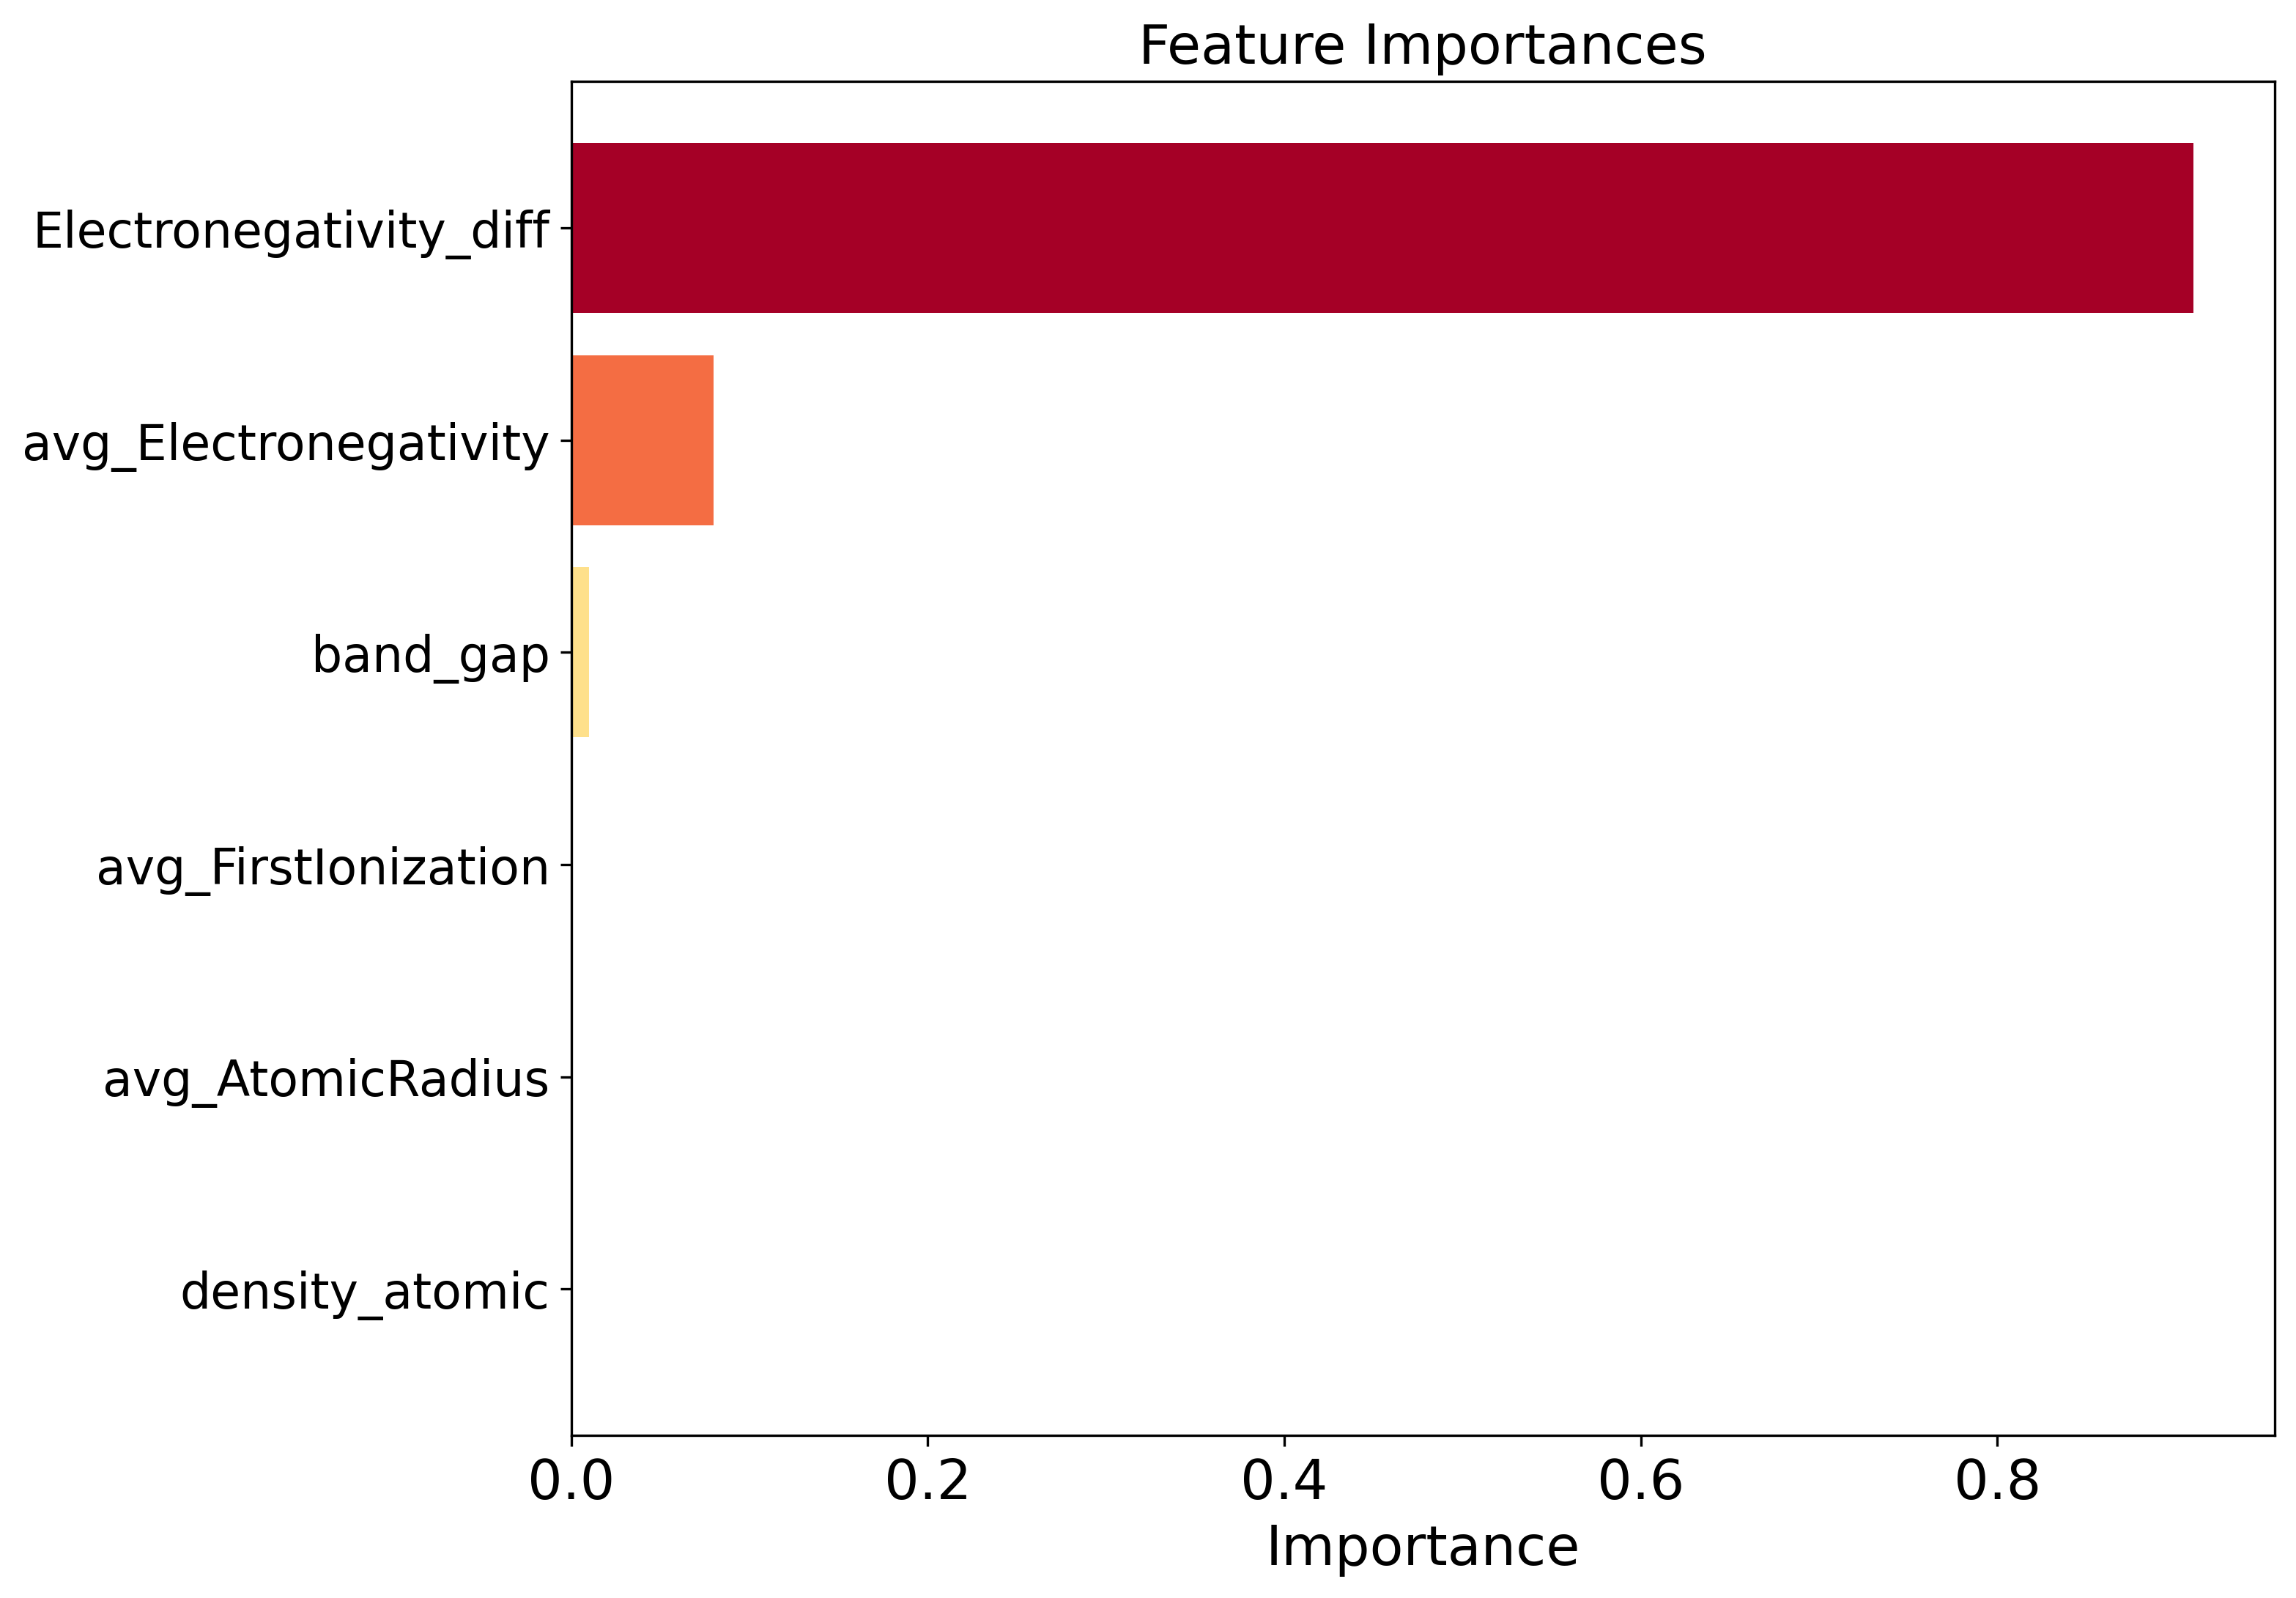

In [50]:
#Feature of Importance
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(best_model.feature_importances_)

# List of tuples with variable and importance
feature_list = list(x.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()

#Random Forest is similar to Decision Tree and
#shows electonegativity difference has the largest effect on formation energy

###Classification Regression

####Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

y = mp_query["metallicity"]
x = mp_query.drop(["metallicity", "material_id", "formula_pretty", "band_gap"], axis = 1)

#Split data
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#split data one more time to create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Training accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing accuracy: ', accuracy_score(y_test, y_test_pred))

Training accuracy:  0.874051593323217
Testing accuracy:  0.8728155339805825


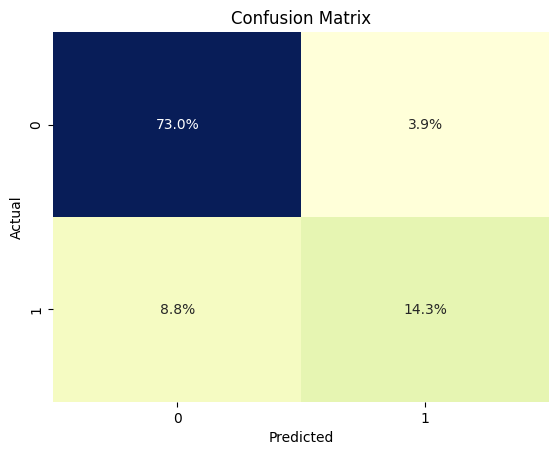

In [53]:
#Create heatmap
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.1%', cmap='YlGnBu', cbar=False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Confusion Matrix shows the logistic model is good at prediciting true negatives
#but not so much on true positives probably due to the unbalanced data

####Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [55]:
#Predict with validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8364188163884674
0.8361650485436893


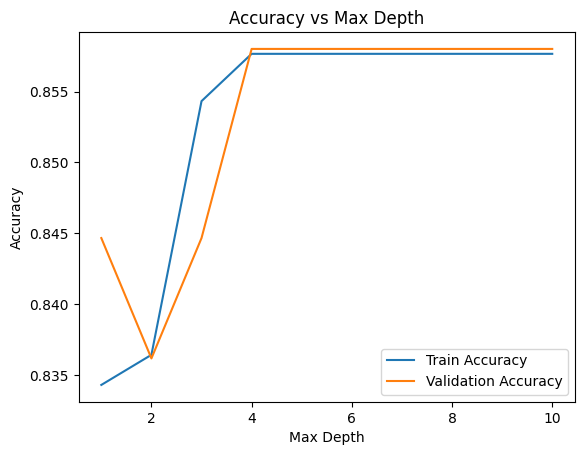

In [56]:
#Optimize
# Define the range of max_depth values to test
max_depth_values = np.arange(1, 11)
# Create empty lists to store accuracy scores
train_accuracy = []
val_accuracy = []
# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Create a model and train it
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth,max_leaf_nodes=6)
    model.fit(X_train, y_train)
    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    # Calculate accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    # Append accuracy scores to the lists
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)
# Plot the accuracy scores
plt.plot(max_depth_values, train_accuracy, label='Train Accuracy')
plt.plot(max_depth_values, val_accuracy, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

In [57]:
#Test with test data
model = DecisionTreeClassifier(criterion="entropy", max_depth=4,max_leaf_nodes=6)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8364188163884674
0.8495145631067961


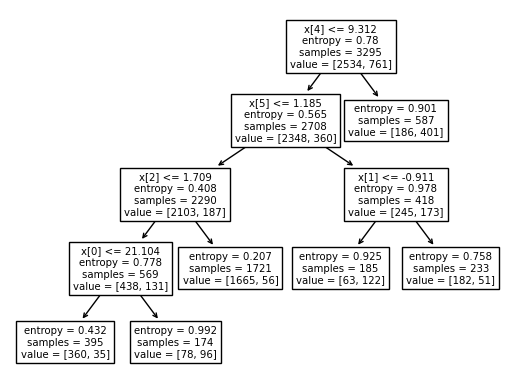

In [58]:
#Visualize our tree
tree.plot_tree(model)
plt.show()

Variable: avg_FirstIonization   Importance: 0.51
Variable: Electronegativity_diff Importance: 0.19
Variable: avg_AtomicRadius      Importance: 0.14
Variable: density_atomic        Importance: 0.1
Variable: formation_energy_per_atom Importance: 0.06
Variable: avg_Electronegativity Importance: 0.0


<ipython-input-59-a17725f951a6>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


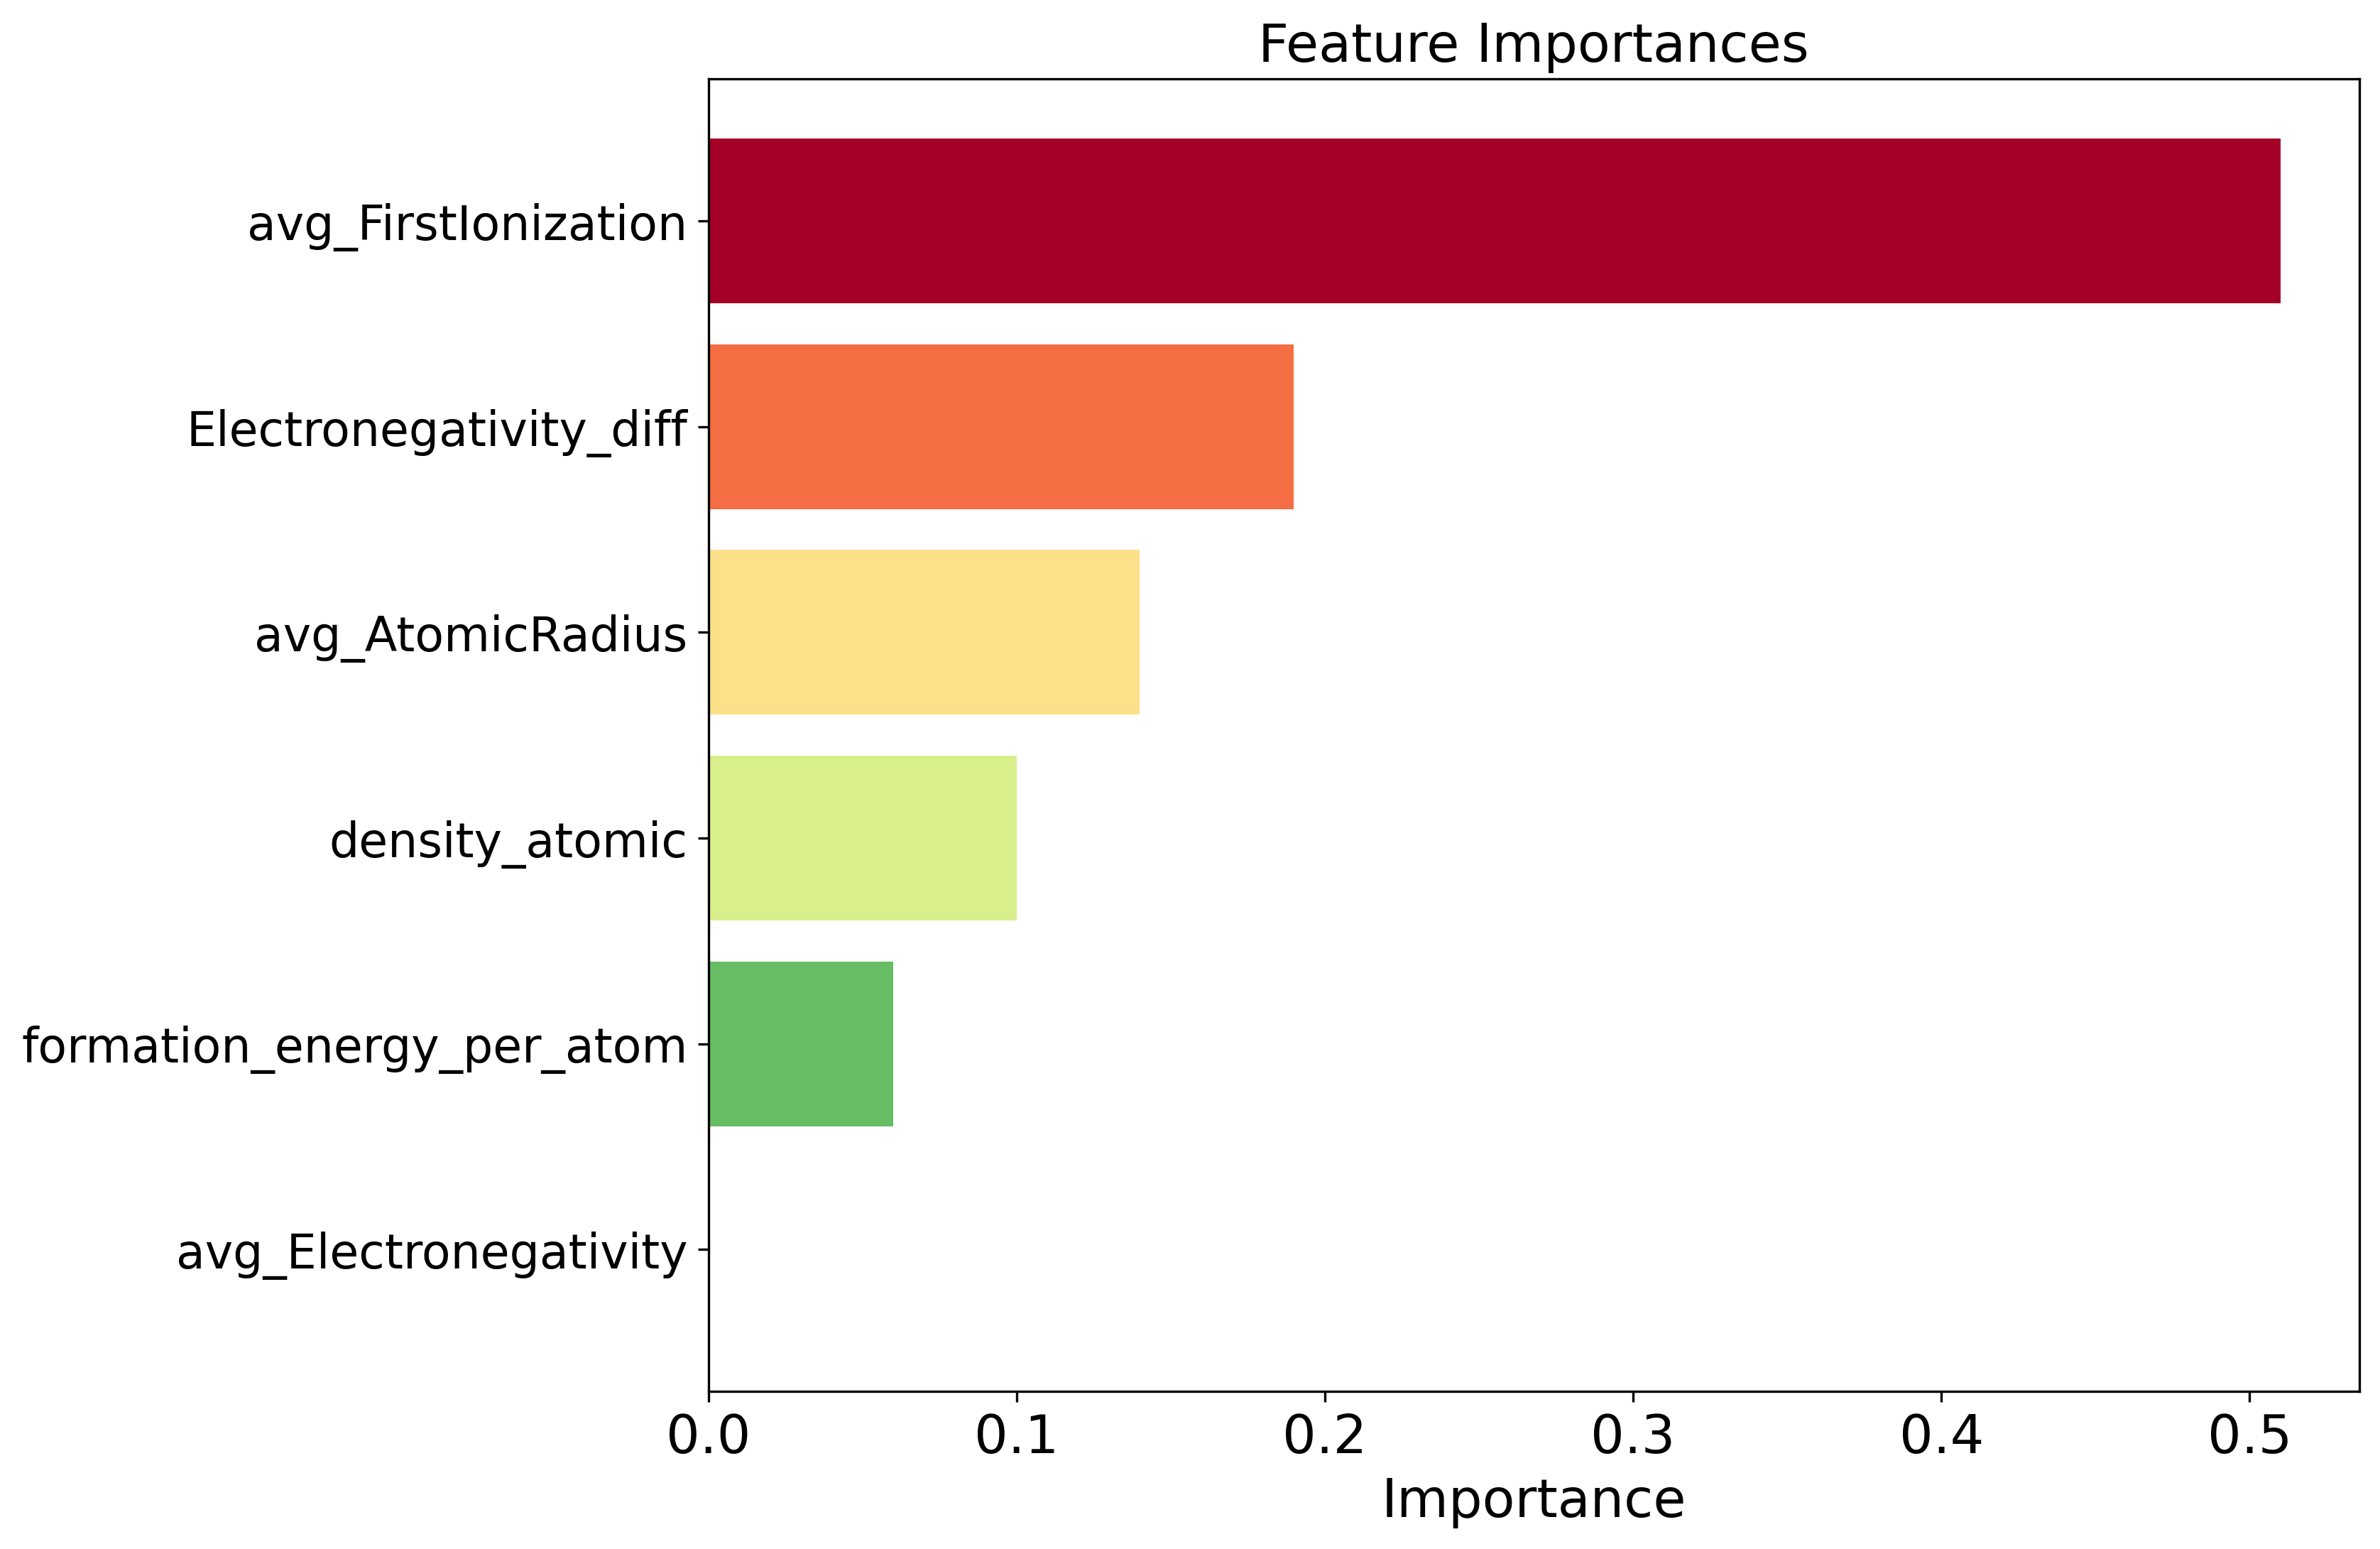

In [59]:
#Feature of Importance
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_list = list(x.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()

#Decision Tree shows the avg first ionization has the largest effect on predicting
#the metallicity of the material

####Random Forest Classifier

In [60]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [61]:
#Predict with validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8415781487101669
0.8422330097087378


In [62]:
#Optimize
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Evaluate on the validation set
# Calculate accuracy scores
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.930804248861912
0.9065533980582524


In [63]:
#Test with test data
y_pred_test = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.9029126213592233


Variable: avg_FirstIonization   Importance: 0.21
Variable: avg_Electronegativity Importance: 0.2
Variable: avg_AtomicRadius      Importance: 0.18
Variable: density_atomic        Importance: 0.16
Variable: formation_energy_per_atom Importance: 0.13
Variable: Electronegativity_diff Importance: 0.12


<ipython-input-64-30e81f6b5728>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


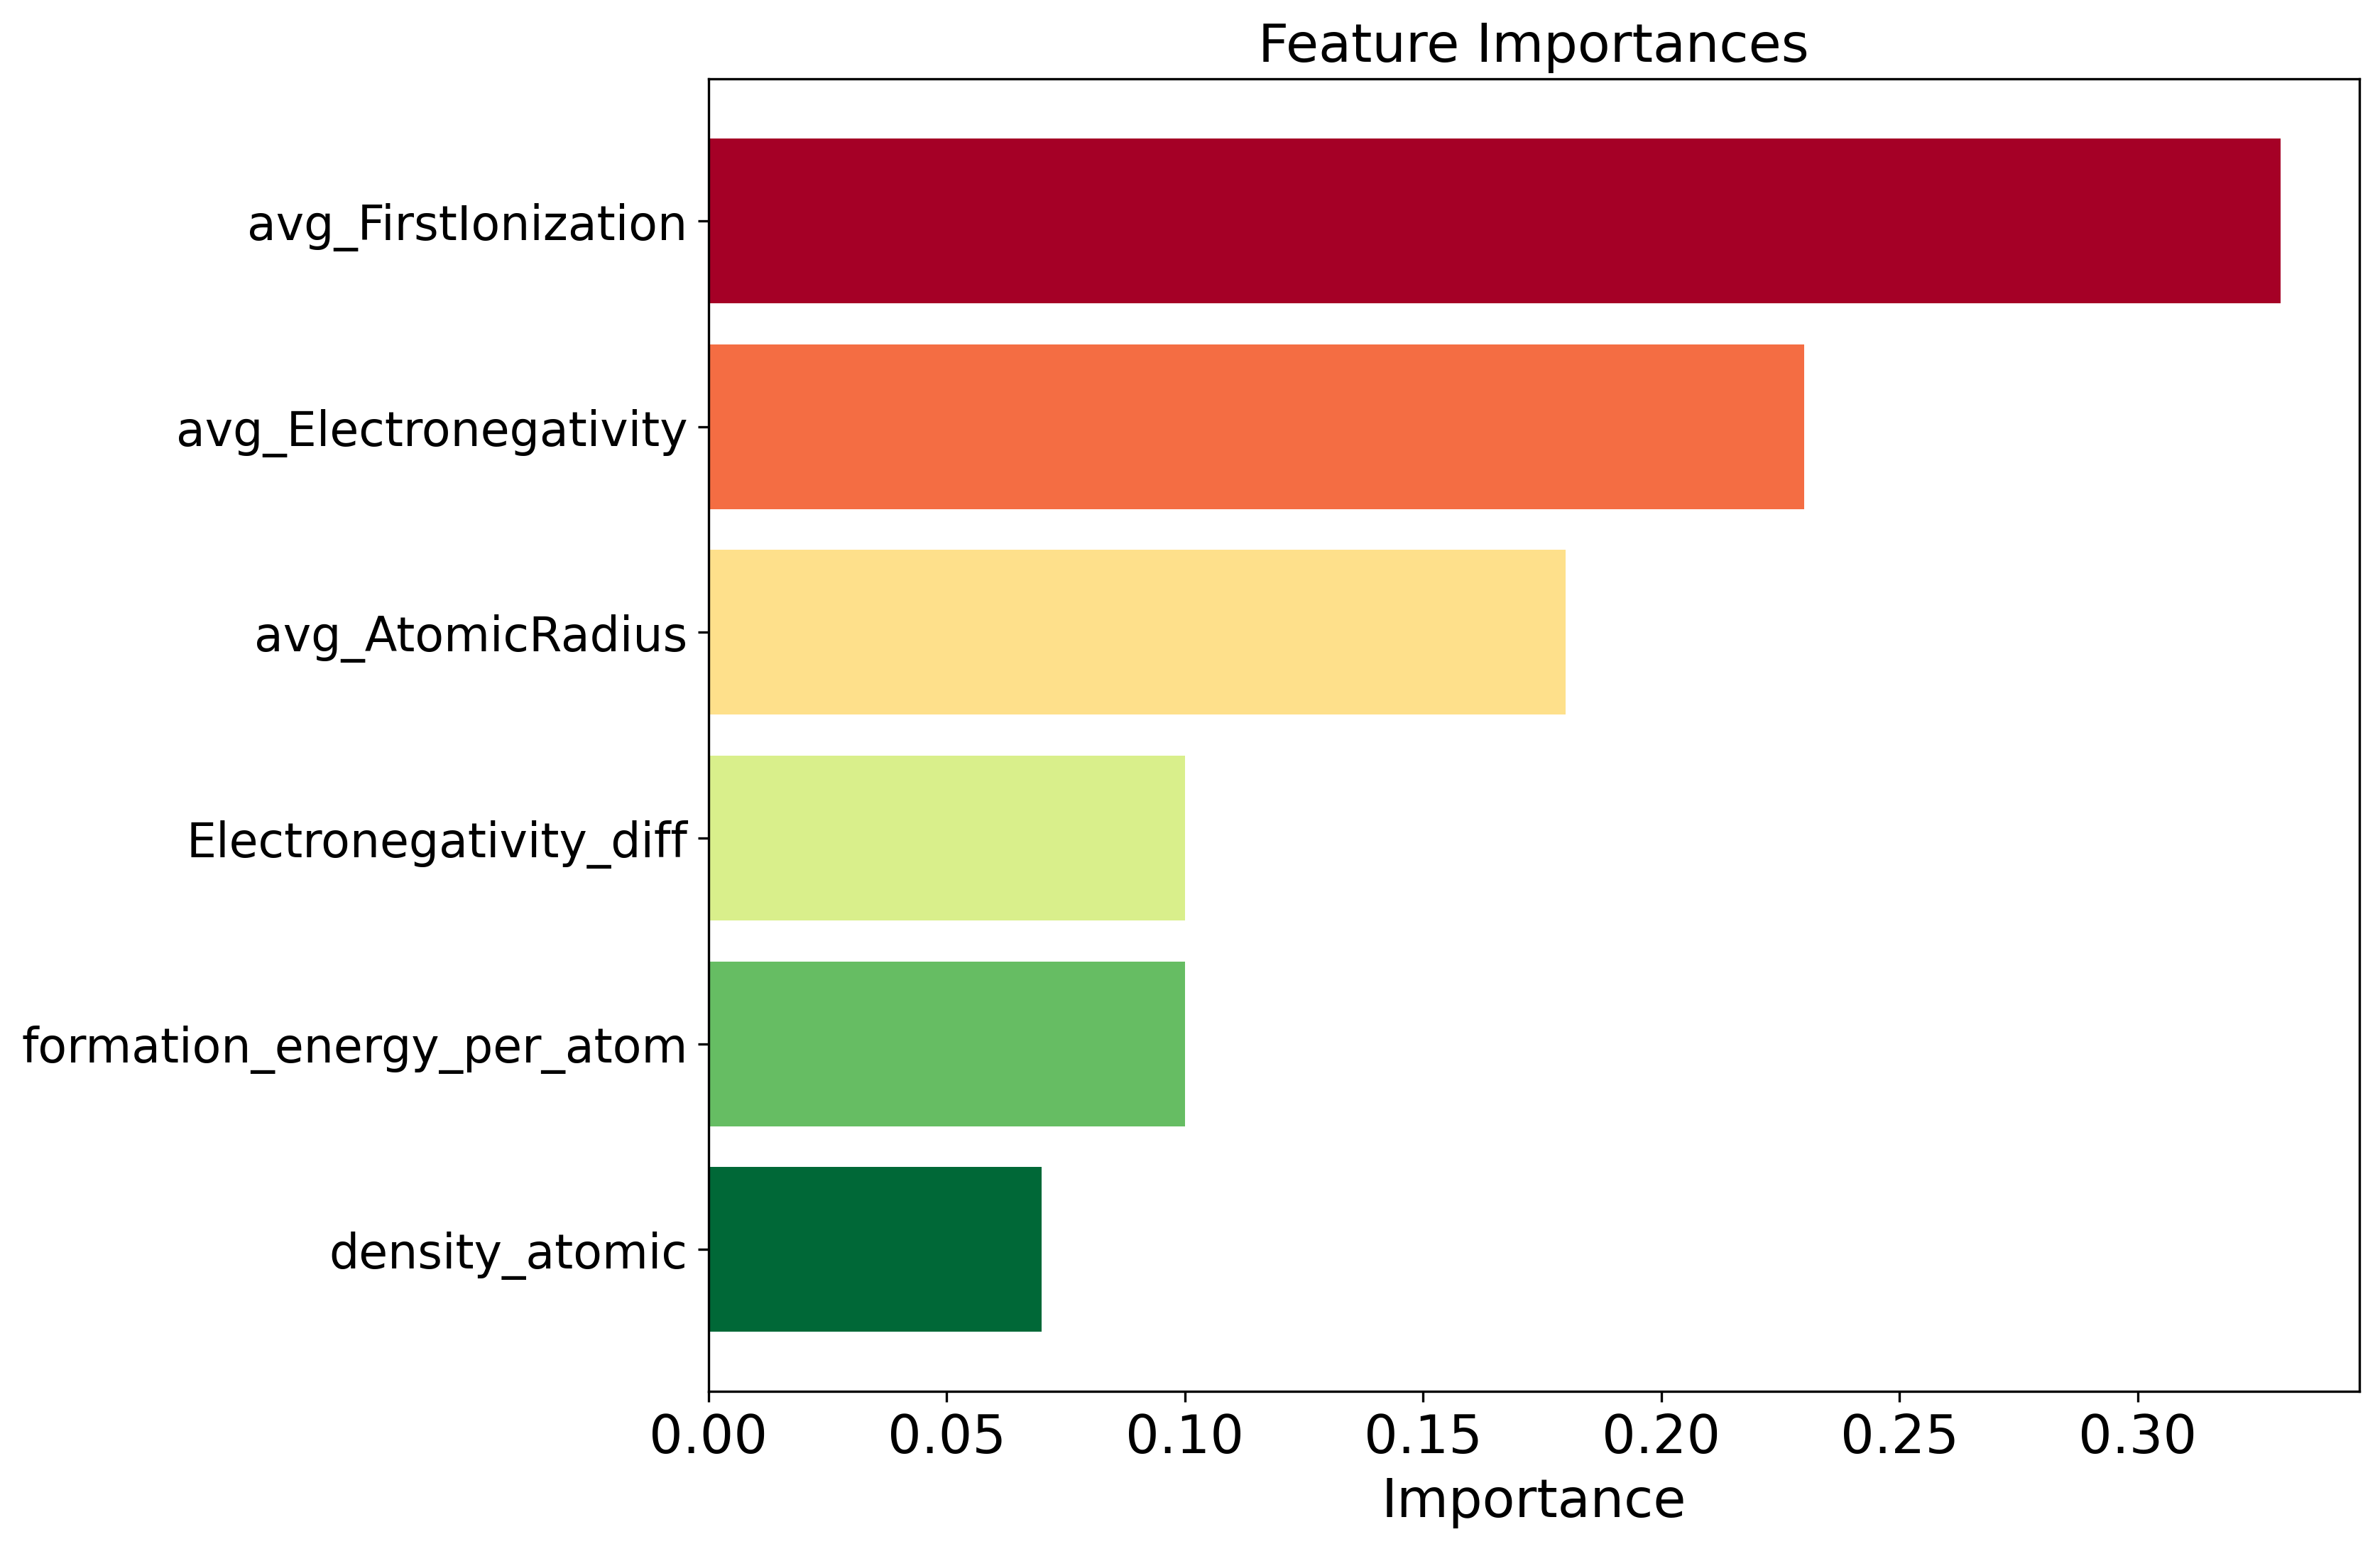

In [64]:
#Feature of Importance
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(best_model.feature_importances_)

# List of tuples with variable and importance
feature_list = list(x.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()

#Random Forest shows the avg electronegativity, avg ionization, and atomic radius has the largest effect on predicting
#the metallicity of the material

####Neural Network

In [65]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier, a class of neural networks
model = MLPClassifier(hidden_layer_sizes=(35,35))
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(35, 35))

In [66]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_val, y_val_pred))

0.8761760242792109
0.8786407766990292


In [67]:
#Optimize
# Define the range of max_depth values to test
hidden_layer = (10, 35, 60)
# Create empty lists to store accuracy scores
train_accuracy = []
val_accuracy = []
# Iterate over different max_depth values
for hidden_layer in hidden_layer:
    # Create a model and train it
    model = MLPClassifier(hidden_layer_sizes=hidden_layer)
    model.fit(X_train, y_train)
    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    # Calculate accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    # Append accuracy scores to the lists
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

print(max(train_accuracy))
print(max(val_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.881638846737481
0.8822815533980582


In [68]:
#Test with test data
y_pred_test = model.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.8689320388349514


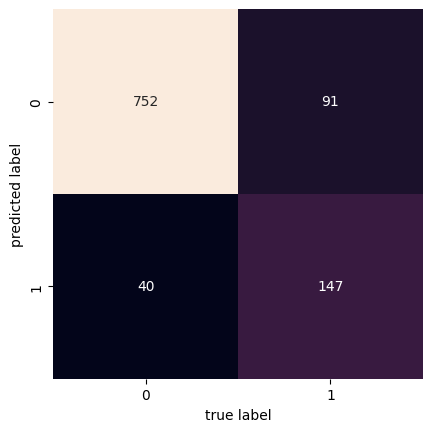

In [69]:
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

####Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

GaussianNB()

In [71]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8482549317147192
0.8514563106796117


##Analyze Composition-Property Relationship

Comparison of Regression Models

|     |Linear Regression|Cross Validation|LASSO|Ridge Regression|Support Vector|Decision Tree|Random Forest|
|-----|-----|-----|----|----|----|----|----|
|MAE|0.310|0.314|0.314|0.330|0.298|0.231|0.220|
|MSE|0.176|0.192|0.192|0.222|0.387|0.126|0.096|
|R^2|0.655|0.626|0.626|0.578|0.263|0.761|0.816|
|Important Features|
|#1|Avg_Ionization||Electronegativity_Diff|Electronegativity_Diff|Avg_Ionization|Electronegativity_Diff|Electronegativity_Diff|
|#2|Avg_Electronegativity||Avg_Electronegativity|Avg_Electronegativity|Avg_Electronegativity|||
|#3|Avg_AtomicRadius||Avg_AtomicRadius|Avg_AtomicRadius|Electronegativity_Diff|||


Comparison of Classification Models

|     |Logistic Regression|Decision Tree|Random Forest|Neural Network|Naive Bayes|
|-----|-----|-----|----|----|----|
|Accuracy|0.873|0.850|0.903|0.869|0.851|


* The regression models showed electronegativity difference had the biggest effect on formation energy. This makes sense because electronegativity is the tendency for atoms to attract electrons in the molecule, so higher electronegativity differences lead to stronger bonding and lower formation energy. In addition, the average ionization energy had a larger effect on the formation energy than other features because elements with low ionization energy tend to lose electrons and form bonds leading to a lower formation energy. The classification models showed electronegativity had an effect on the metallicity because electronegativity is related to band gap.

* Features that do not contribute to the regression model to
predict formation energy is band gap and atomic density. Electronegativity difference and average ionization energy correlated to the formation energy more than atomic radius. For the classification model, formation energy and atomic density did not contribute to the metallicity of the material.

* One of the drawbacks of all the models used was during the optimization process of hyperparameters. Each model could've been iterated over a large range of values for different parameters to obtain the best parameter. However, iterating over a large range of values for multiple parameters would have been time-consuming. Ridge regression is a good example of a model that benefits from iteration of parameter over a large range of values.
Ridge regression is similar to LASSO where an alpha parameter is used for regularization. Depending on what alpha value is chosen, the performance of the model can vary quite a bit. Similarly, the support vector regression had a low performance value, which suggests the optimal parameter was not used. Another drawback might have been due to unbalanced data.The classification models all had similar accuracy values, and this might be due to the unbalanced data for metal vs nonmetal. The confusion matrix in the logistic regression shows the unbalanced nature of the data where the percentage of true negatives is a lot higher than the percentage of true positives.

* Crystal structure, bond energy, electron affinity, and orbital overlap related information are some examples of features of a material that could improve the predictive power of the model because those features are all related to the formation energy and band gap.